- ## Day1宿題　成果物の全体構成

    - ## 1. 取り組み課題について  

        - ### 1_1.選択課題
        - ### 1_2.ゴール
        
    - ## 2. 事前準備

        - ### 2_1.各種ライブラリのインポート
        - ### 2_2.データ（手で補正したmeasurements.csv）の読み込み
        - ### 2_3.読み込んだデータの冒頭５行を確認
        - ### 2_4.読み込んだデータの各列の欠損値の数とデータの型を確認
        - ### 2_5.読み込んだデータの要約統計量の表示
        - ### 2_6.読み込んだデータをガソリンタイプごとに２つのデータに分離
        - ### 2_7.ガソリンタイプE10の要約統計量の表示
        - ### 2_8.ガソリンタイプSP98の要約統計量の表示

    - ## 3. 目的変数と説明変数の関係を確認するためのグラフ作成（データの可視化）

        - ### 3_1.ガソリンタイプE10の可視化
            - ### 3_1_1.散布図行列にして可視化（E10）
            - ### 3_1_2.相関係数の確認（E10）
            - ### 3_1_3.相関係数をヒートマップにして可視化（E10）
        - ### 3_2.ガソリンタイプSP98の可視化
            - ### 3_2_1.散布図行列にして可視化（SP98）
            - ### 3_2_2.相関係数の確認（SP98）
            - ### 3_2_3.相関係数をヒートマップにして可視化（SP98）

    - ## 4. 目的変数を説明するのに有効そうな説明変数を見つける

    - ## 5. DAY1で学んだアルゴリズムでモデルを作成

        - ### 5_1.ガソリンタイプE10のデータに対して重回帰分析をおこなって、予測精度を確認する
        - ### 5_1.ガソリンタイプSP98のデータに対して重回帰分析をおこなって、予測精度を確認する

- ## 1.取り組み課題について

    - ### 1_1.選択課題 ： 課題②を選択。 Car Fuel Consumption ～ Which of two fuels is cheaper,E10 or SP98 ?～

    - ### 1_2.ゴール　 ： 2種類のガソリンそれぞれの100kmあたりの消費量を予測してどちらが安いのか判別する
    

- ## 2.事前準備

- ### 2_1.各種ライブラリのインポート

In [164]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数

- ### 2_2.データ（手で補正したmeasurements.csv）の読み込み
    - #### 補正内容1　：　小数点が「,」になっていたので「.」に補正。
    - #### 補正内容2　：　目的変数にあたるconsumeの列を一番左の列に移動。
    - #### 補正内容3　：　temp_insideの欠損箇所に平均値21.9を補正。pythonの操作で埋めることができなかったため。

In [165]:
df_measurements = pd.read_csv("../1_data/car-consume/measurements_hosei.csv")

- ### 2_3.読み込んだデータの冒頭５行を確認

In [166]:
display(df_measurements.head())

,consume,distance,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,5.0,28.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,4.2,12.0,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,5.5,11.2,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,3.9,12.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,4.5,18.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


- ### 2_4.読み込んだデータの各列の欠損値の数とデータの型を確認

In [167]:
df_measurements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
consume          388 non-null float64
distance         388 non-null float64
speed            388 non-null int64
temp_inside      388 non-null float64
temp_outside     388 non-null int64
specials         93 non-null object
gas_type         388 non-null object
AC               388 non-null int64
rain             388 non-null int64
sun              388 non-null int64
refill liters    13 non-null float64
refill gas       13 non-null object
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


- ### 2_5.読み込んだデータの要約統計量の表示

In [168]:
df_measurements.describe(include='all')

,consume,distance,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
count,388.000000,388.000000,388.000000,388.000000,388.000000,93,388,388.000000,388.000000,388.000000,13.000000,13
unique,NaN,NaN,NaN,NaN,NaN,12,2,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,rain,SP98,NaN,NaN,NaN,NaN,SP98
freq,NaN,NaN,NaN,NaN,NaN,32,228,NaN,NaN,NaN,NaN,8
mean,4.912371,19.652835,41.927835,21.928608,11.358247,NaN,NaN,0.077320,0.123711,0.082474,37.115385,NaN
std,1.033172,22.667837,13.598524,0.994679,6.991542,NaN,NaN,0.267443,0.329677,0.275441,8.587282,NaN
min,3.300000,1.300000,14.000000,19.000000,-5.000000,NaN,NaN,0.000000,0.000000,0.000000,10.000000,NaN
25%,4.300000,11.800000,32.750000,21.500000,7.000000,NaN,NaN,0.000000,0.000000,0.000000,37.600000,NaN
50%,4.700000,14.600000,40.500000,22.000000,10.000000,NaN,NaN,0.000000,0.000000,0.000000,38.000000,NaN
75%,5.300000,19.000000,50.000000,22.500000,16.000000,NaN,NaN,0.000000,0.000000,0.000000,39.000000,NaN


- ### 2_6.読み込んだデータをガソリンタイプごとに２つのデータに分離
    - #### ガソリンタイプごとに分析を進めるため

In [169]:
df_measurements_E10  = df_measurements.query('gas_type == "E10"')
df_measurements_SP98 = df_measurements.query('gas_type == "SP98"')

- ### 2_7.ガソリンタイプE10の要約統計量の表示

In [170]:
df_measurements_E10.describe(include='all')

,consume,distance,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
count,160.000000,160.000000,160.000000,160.000000,160.000000,30,160,160.000000,160.000000,160.000000,5.000000,5
unique,NaN,NaN,NaN,NaN,NaN,9,1,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,rain,E10,NaN,NaN,NaN,NaN,E10
freq,NaN,NaN,NaN,NaN,NaN,12,160,NaN,NaN,NaN,NaN,5
mean,4.931250,21.096250,43.506250,21.916875,10.118750,NaN,NaN,0.043750,0.100000,0.075000,39.600000,NaN
std,0.900956,20.307234,14.077949,0.653604,6.392185,NaN,NaN,0.205181,0.300942,0.264218,3.056959,NaN
min,3.700000,1.700000,14.000000,21.000000,-5.000000,NaN,NaN,0.000000,0.000000,0.000000,37.700000,NaN
25%,4.400000,12.075000,35.000000,21.500000,6.000000,NaN,NaN,0.000000,0.000000,0.000000,38.000000,NaN
50%,4.800000,15.400000,42.000000,21.500000,9.000000,NaN,NaN,0.000000,0.000000,0.000000,38.300000,NaN
75%,5.300000,21.200000,51.000000,22.500000,14.250000,NaN,NaN,0.000000,0.000000,0.000000,39.000000,NaN


- ### 2_8.ガソリンタイプSP98の要約統計量の表示

In [171]:
df_measurements_SP98.describe(include='all')

,consume,distance,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
count,228.000000,228.000000,228.000000,228.000000,228.000000,63,228,228.000000,228.000000,228.000000,8.000000,8
unique,NaN,NaN,NaN,NaN,NaN,8,1,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,rain,SP98,NaN,NaN,NaN,NaN,SP98
freq,NaN,NaN,NaN,NaN,NaN,20,228,NaN,NaN,NaN,NaN,8
mean,4.899123,18.639912,40.820175,21.936842,12.228070,NaN,NaN,0.100877,0.140351,0.087719,35.562500,NaN
std,1.118408,24.179598,13.170122,1.177862,7.271373,NaN,NaN,0.301829,0.348115,0.283509,10.672787,NaN
min,3.300000,1.300000,16.000000,19.000000,-3.000000,NaN,NaN,0.000000,0.000000,0.000000,10.000000,NaN
25%,4.200000,11.800000,32.000000,21.500000,7.000000,NaN,NaN,0.000000,0.000000,0.000000,37.150000,NaN
50%,4.700000,14.150000,39.500000,22.000000,11.000000,NaN,NaN,0.000000,0.000000,0.000000,37.650000,NaN
75%,5.225000,18.150000,48.000000,22.000000,17.000000,NaN,NaN,0.000000,0.000000,0.000000,39.500000,NaN


- ## 3. 目的変数と説明変数の関係を確認するためのグラフ作成（データの可視化）

- ### 3_1.ガソリンタイプE10の可視化

   - ### 3_1_1.散布図行列にして可視化（E10）

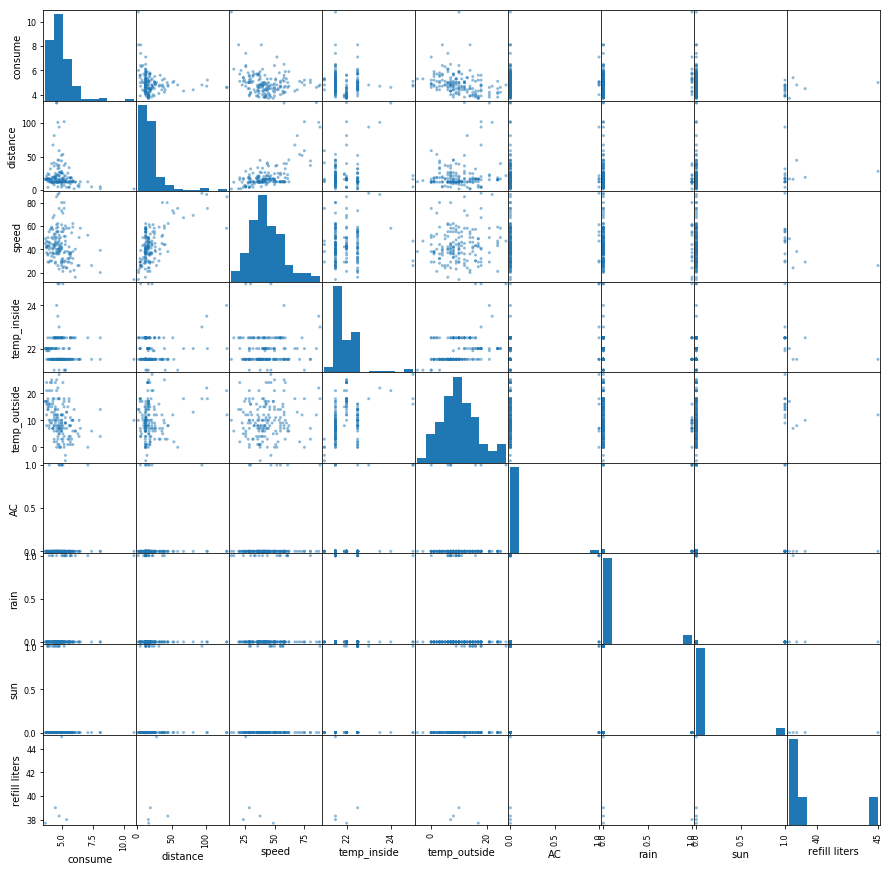

In [172]:
pd.plotting.scatter_matrix(df_measurements_E10, figsize=(15,15))
plt.show()

- ### 3_1_2.相関係数の確認（E10）

In [173]:
# 相関係数を確認
df_measurements_E10.corr()

,consume,distance,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
consume,1.000000,-0.172572,-0.233318,-0.068721,-0.322918,0.043591,0.248199,-0.160503,0.306373
distance,-0.172572,1.000000,0.633082,0.160369,0.158903,0.045776,-0.073315,0.027364,0.169619
speed,-0.233318,0.633082,1.000000,0.034882,0.091093,0.125102,-0.001633,0.128376,-0.458402
temp_inside,-0.068721,0.160369,0.034882,1.000000,0.411985,0.308675,0.058514,0.324036,-0.283444
temp_outside,-0.322918,0.158903,0.091093,0.411985,1.000000,0.048762,-0.097756,0.236743,0.101134
AC,0.043591,0.045776,0.125102,0.308675,0.048762,1.000000,0.336123,0.171118,NaN
rain,0.248199,-0.073315,-0.001633,0.058514,-0.097756,0.336123,1.000000,-0.094916,-0.292587
sun,-0.160503,0.027364,0.128376,0.324036,0.236743,0.171118,-0.094916,1.000000,NaN
refill liters,0.306373,0.169619,-0.458402,-0.283444,0.101134,NaN,-0.292587,NaN,1.000000


- ### 3_1_3.相関係数をヒートマップにして可視化（E10）

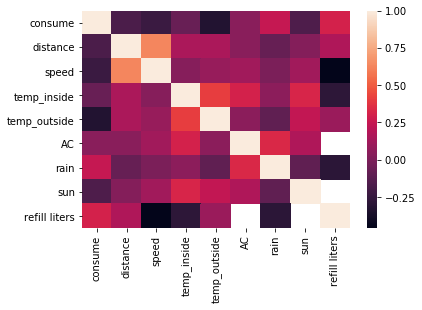

In [174]:
# 相関係数をヒートマップにして可視化
sns.heatmap(df_measurements_E10.corr())
plt.show()

### E10のガソリン消費量に対して、単独で強い相関を持つ説明変数はないことがわかった。

- ### 3_2.ガソリンタイプSP98の可視化

- ### 3_2_1.散布図行列にして可視化（SP98）

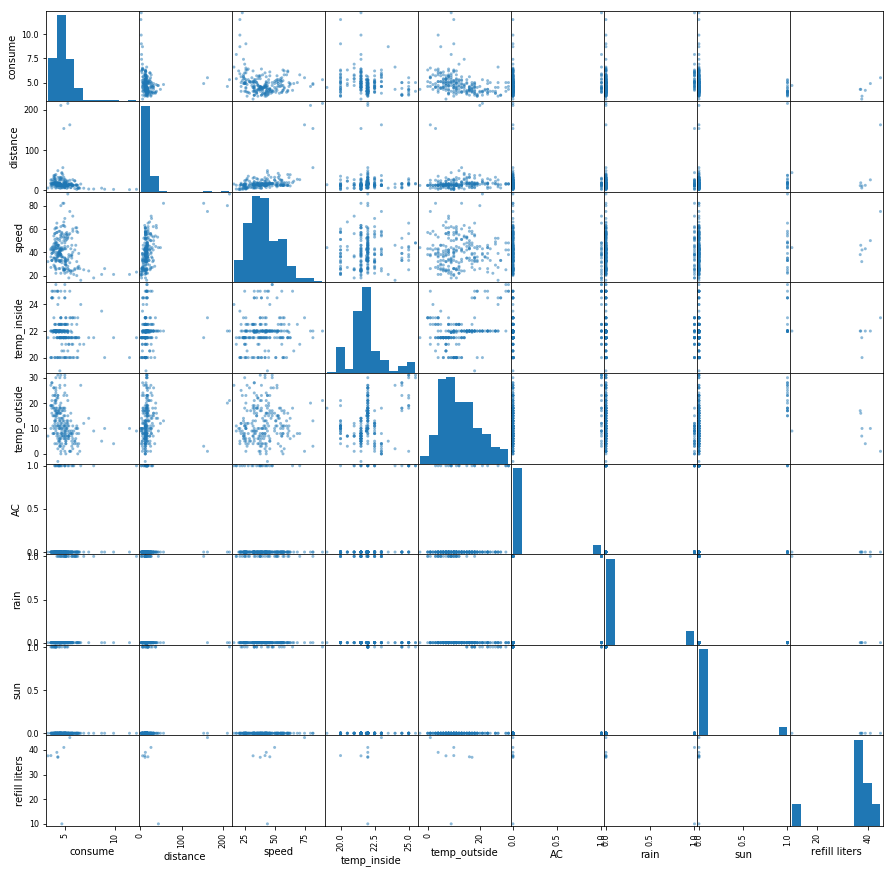

In [175]:
pd.plotting.scatter_matrix(df_measurements_SP98, figsize=(15,15))
plt.show()

- ### 3_2_2.相関係数の確認（SP98）

In [176]:
# 相関係数を確認
df_measurements_SP98.corr()

,consume,distance,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
consume,1.000000,-0.109841,-0.232245,-0.191425,-0.322177,0.120324,0.250377,-0.176202,0.009261
distance,-0.109841,1.000000,0.521258,0.050078,0.065534,-0.046792,0.012206,0.112846,0.173191
speed,-0.232245,0.521258,1.000000,0.075173,-0.009368,-0.102913,0.026668,0.053796,0.301008
temp_inside,-0.191425,0.050078,0.075173,1.000000,0.354743,0.296806,-0.070683,0.221141,0.065833
temp_outside,-0.322177,0.065534,-0.009368,0.354743,1.000000,0.200230,-0.251129,0.411229,-0.162812
AC,0.120324,-0.046792,-0.102913,0.296806,0.200230,1.000000,0.200071,0.050578,NaN
rain,0.250377,0.012206,0.026668,-0.070683,-0.251129,0.200071,1.000000,-0.125294,-0.581920
sun,-0.176202,0.112846,0.053796,0.221141,0.411229,0.050578,-0.125294,1.000000,NaN
refill liters,0.009261,0.173191,0.301008,0.065833,-0.162812,NaN,-0.581920,NaN,1.000000


- ### 3_2_3.相関係数をヒートマップにして可視化（SP98）

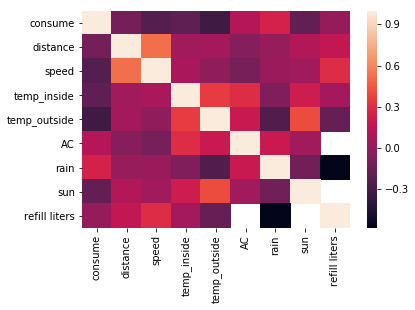

In [177]:
# 相関係数をヒートマップにして可視化
sns.heatmap(df_measurements_SP98.corr())
plt.show()

### SP98のガソリン消費量に対して、単独で強い相関を持つ説明変数はないことがわかった。

## 4. 目的変数を説明するのに有効そうな説明変数を見つける
- データ可視化の結果、E10のガソリン消費量に対しても、SP98のガソリン消費量に対しても、単独で強い相関を持つ説明変数はなかった。
- しかし、どの説明変数も感覚的には影響があると思われるため、欠損値のない変数をすべて用いた重回帰分析モデルを作成することとする。

## 5. DAY1で学んだアルゴリズムでモデルを作成し、予測精度を確認する

- ### 5_1.ガソリンタイプE10のデータに対して重回帰分析をおこなって、予測精度を確認する

In [178]:
# 係数を求める
y = df_measurements_E10["consume"].values
X = df_measurements_E10[["distance", "speed", "temp_inside", "temp_outside", "AC" ,"rain" ,"sun"]].values
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)

# 重みを取り出す
w0 = regr.intercept_
w1 = regr.coef_[0]
w2 = regr.coef_[1]
w3 = regr.coef_[2]
w4 = regr.coef_[3]
w5 = regr.coef_[4]
w6 = regr.coef_[5]
w7 = regr.coef_[6]

# 変数の設定
x1 = df_measurements_E10["distance"]
x2 = df_measurements_E10["speed"]
x3 = df_measurements_E10["temp_inside"]
x4 = df_measurements_E10["temp_outside"]
x5 = df_measurements_E10["AC"]
x6 = df_measurements_E10["rain"]
x7 = df_measurements_E10["sun"]
y = df_measurements_E10["consume"]

# 重みと二乗誤差の確認
y_est = w0 + w1 * x1 + w2 * x2 + w3 * x3 + w4 * x4 + w5 * x5 + w6 * x6 + w7 * x7
squared_error = 0.5 * np.sum((y - y_est) ** 2)
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}, w4 = {:.3f}, w5 = {:.3f}, w6 = {:.3f}, w7 = {:.3f}, 二乗誤差 = {:.3f}'.format(w0, w1, w2, w3, w4, w5, w6, w7, squared_error))

# 値を予測
y_pred = regr.predict(X)

# MSEを計算
mse = mean_squared_error(y, y_pred) 
print("MSE = %s"%round(mse,3) )  

# MAEを計算
mae = mean_absolute_error(y, y_pred) 
print("MAE = %s"%round(mae,3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

w0 = 3.847, w1 = 0.001, w2 = -0.013, w3 = 0.093, w4 = -0.042, w5 = 0.019, w6 = 0.623, w7 = -0.226, 二乗誤差 = 51.599
MSE = 0.645
MAE = 0.545
RMSE = 0.803


- ### 5_2.ガソリンタイプSP98のデータに対して重回帰分析をおこなって、予測精度を確認する

In [179]:
# 係数を求める
y = df_measurements_SP98["consume"].values
X = df_measurements_SP98[["distance", "speed", "temp_inside", "temp_outside", "AC" ,"rain" ,"sun"]].values
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)

# 重みを取り出す
w0 = regr.intercept_
w1 = regr.coef_[0]
w2 = regr.coef_[1]
w3 = regr.coef_[2]
w4 = regr.coef_[3]
w5 = regr.coef_[4]
w6 = regr.coef_[5]
w7 = regr.coef_[6]

# 変数の設定
x1 = df_measurements_SP98["distance"]
x2 = df_measurements_SP98["speed"]
x3 = df_measurements_SP98["temp_inside"]
x4 = df_measurements_SP98["temp_outside"]
x5 = df_measurements_SP98["AC"]
x6 = df_measurements_SP98["rain"]
x7 = df_measurements_SP98["sun"]
y = df_measurements_SP98["consume"]

# 重みと二乗誤差の確認
y_est = w0 + w1 * x1 + w2 * x2 + w3 * x3 + w4 * x4 + w5 * x5 + w6 * x6 + w7 * x7
squared_error = 0.5 * np.sum((y - y_est) ** 2)
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}, w4 = {:.3f}, w5 = {:.3f}, w6 = {:.3f}, w7 = {:.3f}, 二乗誤差 = {:.3f}'.format(w0, w1, w2, w3, w4, w5, w6, w7, squared_error))

# 値を予測
y_pred = regr.predict(X)

# MSEを計算
mse = mean_squared_error(y, y_pred) 
print("MSE = %s"%round(mse,3) )  

# MAEを計算
mae = mean_absolute_error(y, y_pred) 
print("MAE = %s"%round(mae,3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

w0 = 8.379, w1 = 0.002, w2 = -0.020, w3 = -0.105, w4 = -0.042, w5 = 0.585, w6 = 0.466, w7 = -0.083, 二乗誤差 = 110.929
MSE = 0.973
MAE = 0.658
RMSE = 0.986
